# Sentiment Analysis using Naive Bayes Classifier of BEST BUY Google Mini Reviews


###  Following steps followed for the analysis
 1.  Scraped the data from Internet using Beautiful Soup
 2.  Tokenized the reviews using NLTK
 3.  Categorized the reviews into positive and negative using the Bing Lexicon as reference
 4.  Extracted features from the reviews and sentiment
 5.  Applied Naive Bayes Classifier to predict the sentiment of reviews for the test data
 6.  Calculated the accuracy of the classifier


In [134]:
#Importing the required libraries
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from nltk.corpus import stopwords
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split


## Scraped the data from Internet using Beautiful Soup

In [136]:
#Scraping Google Mini reviews from Best Buy using Beautiful Soup
data = []
for i in range(1,250):

    url = ("https://www.bestbuy.com/site/reviews/google-home-mini-charcoal/6082195?rating=1%2C2%2C3%2C4&page="+ str(i))
    page = urlopen(url)
    soup = BeautifulSoup(page)
    #print(soup.prettify())
    x = soup.find_all("li", {"class":"review-item"})
    for item in x:
        author_name =item.find_all("div",attrs = {"class":"author"})[0].text
        rating = item.find_all("span",attrs={"class":"c-review-average"})[0].text
        review_title = item.find_all("h4",attrs={"class":"col-md-9 col-sm-9 col-xs-12 title"})[0].text
        review_description = item.find_all("p",attrs={"class":"pre-white-space"})[0].text
        data.append((author_name,rating, review_title,review_description ))
        #data.append((a2,r2))
        #print(data)

C:\Users\kruts\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\kruts\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [137]:
#Reading the reviews into a dataframe using Pandas
reviews_df= pd.DataFrame(data)
reviews_df.columns = ["Review_Author","Review_Rating","Review_Title","Review_Description"]

In [138]:
reviews_df.head()

,Review_Author,Review_Rating,Review_Title,Review_Description
0,InflatedKarma,4,I prefer over the echo,I have been playing around with both the googl...
1,Sponge,4,Met expectations,I have both a Google Home and Google Home mini...
2,7portusb,4,Google home mini,Purchased this for 91 year old mother who has ...
3,Rich,4,Solid Assistant for Small Room,I replaced an Echo Dot with this Google Home M...
4,mccaf,3,Google vs Amazon,"Fun to try this new personal assistant, but we..."


In [139]:
def isNotNull(value):
    return value is not None and len(value)>0

In [140]:
os.chdir('C:\\Users\\kruts\\MastersNorthEastern\\Spring2018\\ADS_2018\\Assignments\\Assignment_8\\opinion-lexicon-English\\')
dict_pos = []
dict_neg = []
f = open('negative-words.txt','r')
for line in f:
    t= line.strip().lower()
    if (isNotNull(t)):
           dict_neg.append(t)
f.close()

f = open('positive-words.txt','r')
for line in f:
    t = line.strip().lower();
    if (isNotNull(t)):
        dict_pos.append(t)
f.close()

In [141]:
del dict_pos[0:34]
del dict_neg[0:34]

## Tokenized the reviews using NLTK

In [143]:
tweets = []

positive_count_summary_list = []
positive_summary_count= []

positive_words_list = []

negative_count_summary_list = []
negative_summary_count =[]

negative_words_list = []

appended_data = pd.DataFrame([])
sentiment_summary_list = []

stopwords_set = set(stopwords.words("english"))

for index, row in reviews_df.iterrows():
    
        words_filtered = [e.lower() for e in row.Review_Description.split() if len(e) >= 3]
        words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
        
        positive_words = set(dict_pos).intersection(words_without_stopwords)
        positive_words_list.append(positive_words)
        
        positive_count = len(set(dict_pos).intersection(words_without_stopwords))
        negative_count = len(set(dict_neg).intersection(words_without_stopwords))
        
        negative_words = set(dict_neg).intersection(words_without_stopwords)
        negative_words_list.append(negative_words)

        positive_count_summary_list.append(positive_count)
        negative_count_summary_list.append(negative_count)
    
        if positive_count > negative_count:
            sentiment_summary_list.append('positive')
            #tweets.append((words_without_stopwords,sentiment_summary_list))

            
        elif positive_count < negative_count:
            sentiment_summary_list.append('negative')

        else:
            sentiment_summary_list.append('neutral')
        reviews_df['summary_sentiment'] = pd.DataFrame((sentiment_summary_list))
        tweets.append((words_without_stopwords, row.summary_sentiment))


In [145]:
reviews_df = reviews_df.assign(positive_words_count=pd.Series(positive_count_summary_list).values)
reviews_df = reviews_df.assign(negative_words_count=pd.Series(negative_count_summary_list).values)
reviews_df = reviews_df.assign(positive_words=pd.Series(positive_words_list).values)
reviews_df = reviews_df.assign(negative_words=pd.Series(negative_words_list).values)


## Categorized the reviews into positive and negative using the Bing Lexicon as reference

In [146]:
reviews_df.head()

,Review_Author,Review_Rating,Review_Title,Review_Description,summary_sentiment,positive_words_count,negative_words_count,positive_words,negative_words
0,InflatedKarma,4,I prefer over the echo,I have been playing around with both the googl...,positive,7,4,"{cool, better, preferred, good, personalized, ...","{concerned, oppose, issues, lengthy}"
1,Sponge,4,Met expectations,I have both a Google Home and Google Home mini...,positive,6,3,"{pretty, enough, faster, better, good, top}","{disabled, complaint, rumor}"
2,7portusb,4,Google home mini,Purchased this for 91 year old mother who has ...,negative,0,2,{},"{confuse, degeneration}"
3,Rich,4,Solid Assistant for Small Room,I replaced an Echo Dot with this Google Home M...,positive,3,1,"{good, intuitive, richer}",{loud}
4,mccaf,3,Google vs Amazon,"Fun to try this new personal assistant, but we...",positive,4,0,"{good, fun, prefer, work}",{}


## Visualized the set of positive words in reviews

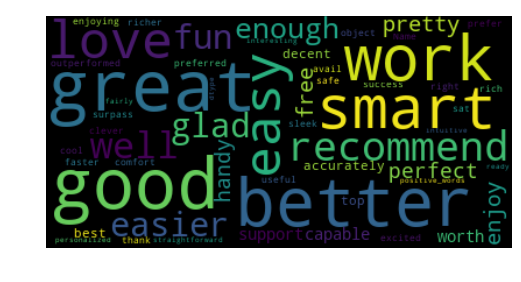

In [147]:
wordcloud = WordCloud(background_color='black',
                          #stopwords=stopwords,
                          max_words=800,
                          max_font_size=60, 
                          random_state=50).generate(str(reviews_df['positive_words']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Visualized the set of negative words in reviews

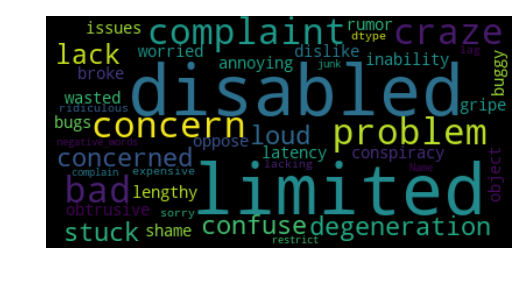

In [148]:
wordcloud = WordCloud(background_color='black',
                          #stopwords=stopwords,
                          max_words=800,
                          max_font_size=60, 
                          random_state=50).generate(str(reviews_df['negative_words']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [167]:
reviews_df['Review_Length'] = reviews_df['Review_Description'].apply(len)

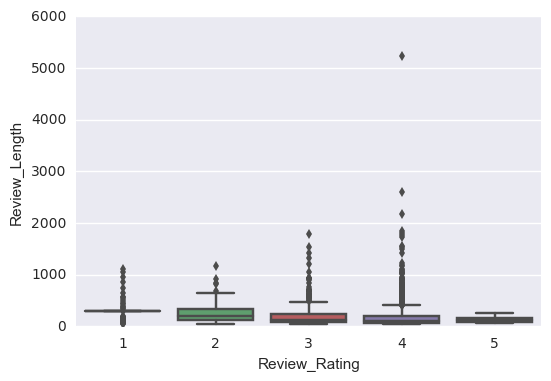

In [168]:
sns.boxplot(x='Review_Rating', y='Review_Length', data=reviews_df)


## Correlation of review ratings to the sentiments of the reviews

In [173]:
rating = reviews_df.groupby('Review_Rating').mean()
rating.corr()

,positive_words_count,negative_words_count,Review_Length
positive_words_count,1.000000,0.065498,-0.334092
negative_words_count,0.065498,1.000000,0.604828
Review_Length,-0.334092,0.604828,1.000000


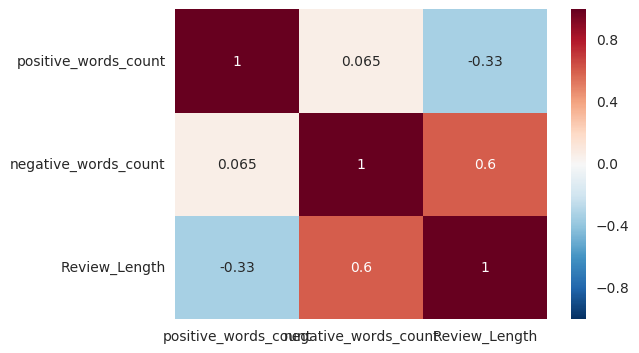

In [174]:
sns.heatmap(data=rating.corr(), annot=True)


In [157]:
df= pd.DataFrame(reviews_df[['Review_Description','summary_sentiment']])

In [158]:
df.head()

,Review_Description,summary_sentiment
0,I have been playing around with both the googl...,positive
1,I have both a Google Home and Google Home mini...,positive
2,Purchased this for 91 year old mother who has ...,negative
3,I replaced an Echo Dot with this Google Home M...,positive
4,"Fun to try this new personal assistant, but we...",positive


In [159]:
df_pos = df.groupby('summary_sentiment').get_group("positive")['Review_Description']

df_neg = df.groupby('summary_sentiment').get_group("negative")['Review_Description']


## Extracted features from the reviews and sentiment

In [160]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

In [162]:
data= nltk.classify.apply_features(extract_features,tweets)

In [163]:
train, test = train_test_split(data,test_size = 0.2)

## Applied Naive Bayes Classifier to predict the sentiment of reviews for the test data

In [164]:
classifier = nltk.NaiveBayesClassifier.train(train)

## Calculated the accuracy of the classifier

In [165]:
print(nltk.classify.accuracy(classifier,test))

0.8640483383685801


In [166]:
neu_cnt = 0
pos_cnt = 0
for obj in df_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    #print(res)
    if(res == 'negative'): 
        neu_cnt = neu_cnt + 1
for obj in df_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (neu_cnt,len(df_neg)))        
print('[Positive]: %s/%s '  % (pos_cnt,len(df_pos)))

[Negative]: 135/231 
[Positive]: 3843/3983 
